https://github.com/ianormy/ClimateSpiralMatplotlib/tree/main

In [44]:
import os
import matplotlib.pyplot as plt
from matplotlib.offsetbox import (
    AnchoredOffsetbox, AuxTransformBox, DrawingArea, TextArea, VPacker)
import math
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import pandas as pd

import seaborn as sns
import matplotlib.font_manager as fm

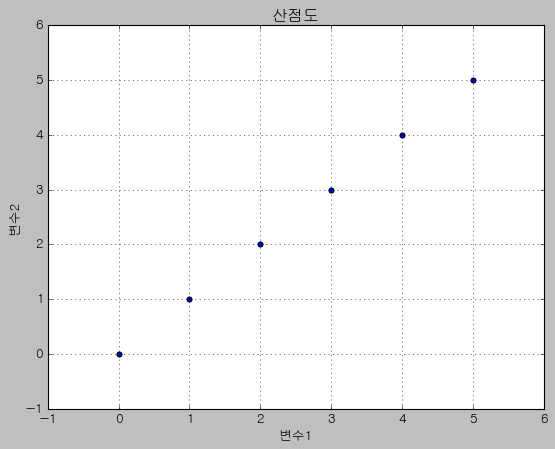

In [87]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
 
plt.scatter([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])
plt.title('산점도')
plt.xlabel('변수1')
plt.ylabel('변수2')
plt.grid(True)
plt.show()

font_location = fm.findfont('NanumGothic')
font_name = fm.FontProperties(fname=font_location).get_name()

### CSV파일 불러오기

In [4]:
# csv파일 불러오기
df = pd.read_csv('천안 기온 데이터.csv', encoding = 'euc-kr')

### 데이터셋 확인

In [5]:
len(df)

18822

In [6]:
df.head(5)

,\t\t지점번호,지점명,일시,평균기온(℃),최고기온(℃),\t최고기온시각,최저기온(℃),최저기온시각일교차,Unnamed: 8
0,\t\t232,천안,1972-01-08,NaN,6.1,4:30,-4.9,7:40,11.0
1,\t\t232,천안,1972-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2,\t\t232,천안,1972-01-10,NaN,NaN,NaN,NaN,NaN,NaN
3,\t\t232,천안,1972-01-11,NaN,11.9,15:05,3.8,24:00:00,8.1
4,\t\t232,천안,1972-01-12,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18822 entries, 0 to 18821
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   		지점번호      18822 non-null  object 
 1   지점명         18814 non-null  object 
 2   일시          18814 non-null  object 
 3   평균기온(℃)     18453 non-null  float64
 4   최고기온(℃)     18469 non-null  float64
 5   	최고기온시각     18469 non-null  object 
 6   최저기온(℃)     18468 non-null  float64
 7   최저기온시각일교차   18468 non-null  object 
 8   Unnamed: 8  18468 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.3+ MB


In [11]:
!pip install missingno

In [7]:
# 결측치 개수 확인
missing_count = df.isnull().sum()
print(missing_count)

\t\t지점번호        0
지점명             8
일시              8
평균기온(℃)       369
최고기온(℃)       353
\t최고기온시각      353
최저기온(℃)       354
최저기온시각일교차     354
Unnamed: 8    354
dtype: int64


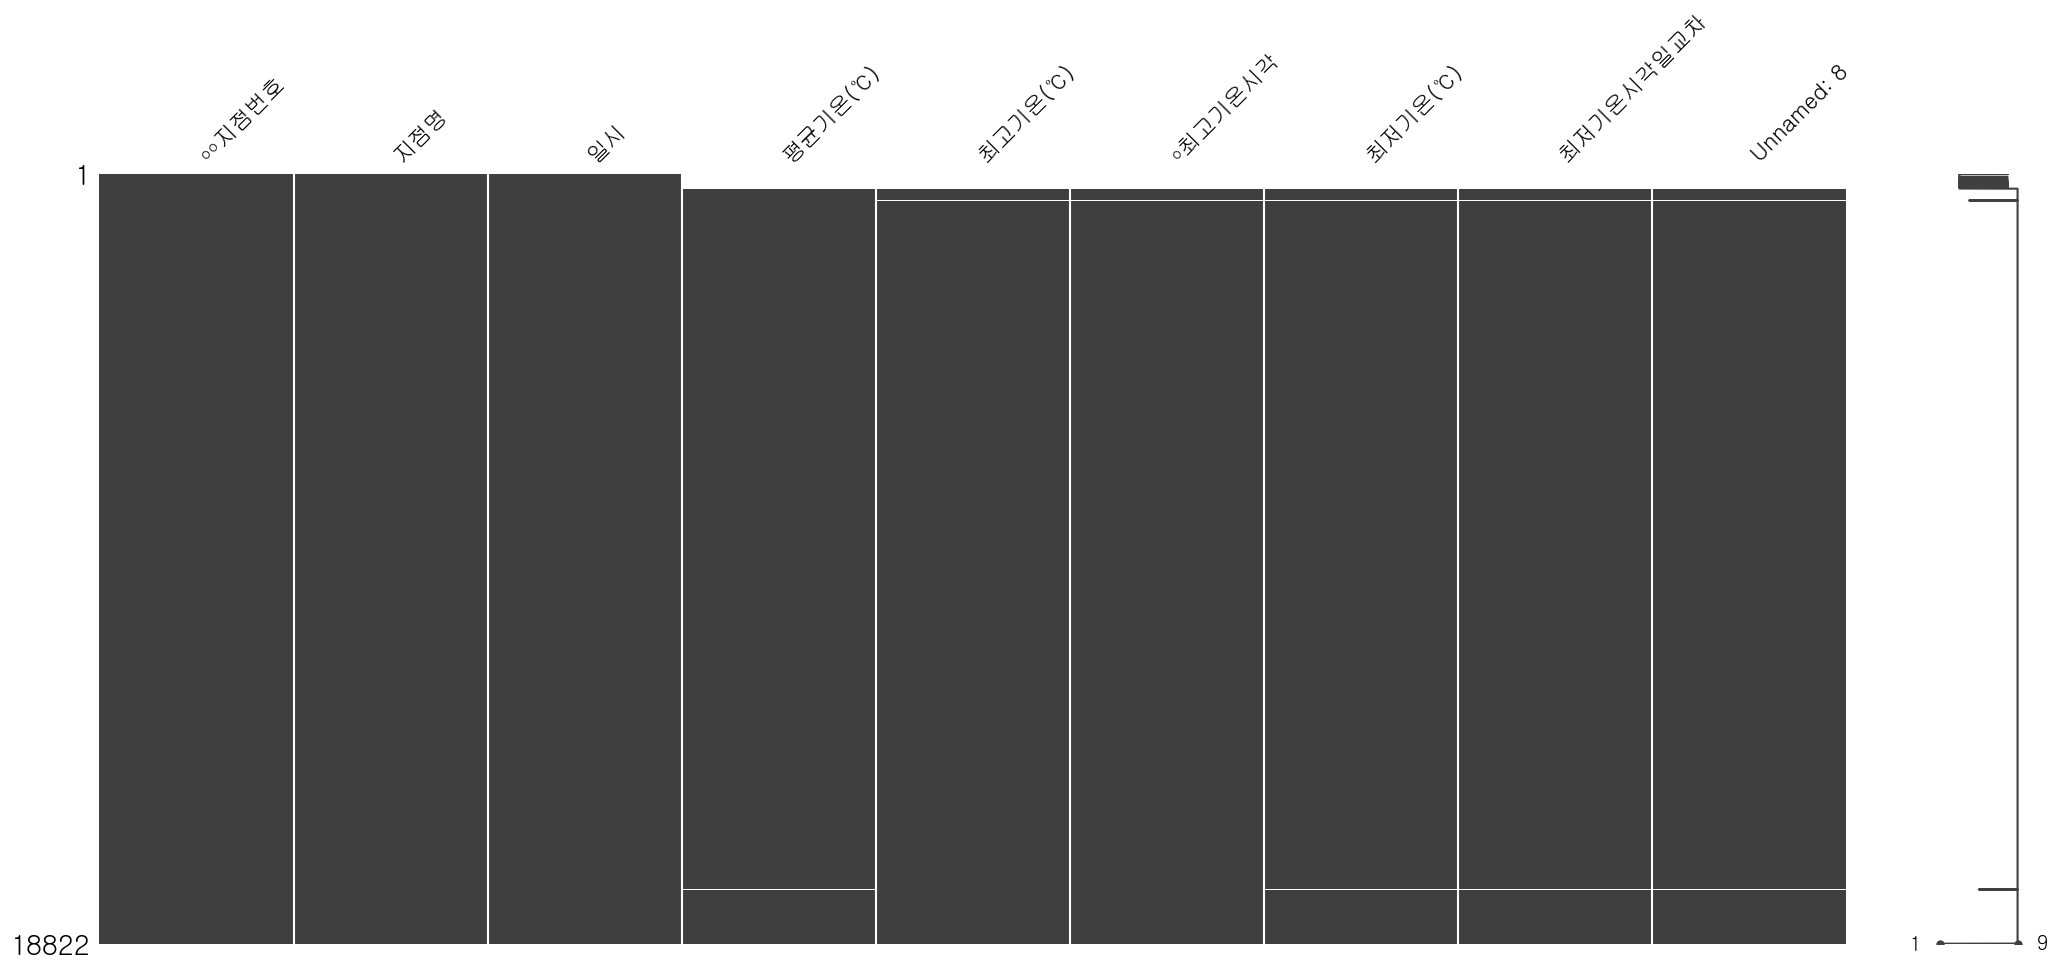

In [14]:
import missingno as msno
msno.matrix(df)
plt.show()

In [90]:
# 결측치가 있는 행 삭제
df_dropped = df.dropna(axis=0)

# 결과 출력
print(df_dropped)

      \t\t지점번호 지점명         일시  평균기온(℃)  최고기온(℃) \t최고기온시각  최저기온(℃) 최저기온시각일교차  \
359    \t\t232  천안 1973-01-01      2.9      7.8    13:38      0.1     22:41   
360    \t\t232  천안 1973-01-02     -5.2      0.6     0:17     -7.2     21:00   
361    \t\t232  천안 1973-01-03     -5.4     -2.0    14:52    -14.5      4:56   
362    \t\t232  천안 1973-01-04     -2.8      2.1    15:58     -8.0      1:52   
363    \t\t232  천안 1973-01-05     -0.9      5.1    13:27     -4.6      2:46   
...        ...  ..        ...      ...      ...      ...      ...       ...   
18809  \t\t232  천안 2023-07-08     24.1     29.5    16:03     19.9      0:01   
18810  \t\t232  천안 2023-07-09     25.0     28.8    13:41     22.3      4:45   
18811  \t\t232  천안 2023-07-10     25.8     30.7    15:42     21.2      5:31   
18812  \t\t232  천안 2023-07-11     23.7     26.0    16:54     22.1      3:56   
18813  \t\t232  천안 2023-07-12     26.2     29.9    16:29     22.7      3:39   

       Unnamed: 8      년도  
359           7.7  1973

In [9]:
print(len(df_dropped))

18452


In [52]:
# '일시' 열을 datetime 형식으로 변환
df_dropped['일시'] = pd.to_datetime(df_dropped['일시'])

# '일시' 열을 월 단위로 묶고 평균 기온 계산
df_monthly = df_dropped.groupby(df_dropped['일시'].dt.to_period('M'))['평균기온(℃)'].mean().reset_index()
df_monthly

C:\Users\thesw\AppData\Local\Temp\ipykernel_16764\4121058018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['일시'] = pd.to_datetime(df_dropped['일시'])


,일시,평균기온(℃)
0,1973-01,-0.109677
1,1973-02,0.425000
2,1973-03,3.893548
3,1973-04,12.146667
4,1973-05,16.600000
...,...,...
602,2023-03,8.645161
603,2023-04,12.890000
604,2023-05,18.012903
605,2023-06,22.600000


In [27]:
df_dropped

,\t\t지점번호,지점명,일시,평균기온(℃),최고기온(℃),\t최고기온시각,최저기온(℃),최저기온시각일교차,Unnamed: 8
359,\t\t232,천안,1973-01-01,2.9,7.8,13:38,0.1,22:41,7.7
360,\t\t232,천안,1973-01-02,-5.2,0.6,0:17,-7.2,21:00,7.8
361,\t\t232,천안,1973-01-03,-5.4,-2.0,14:52,-14.5,4:56,12.5
362,\t\t232,천안,1973-01-04,-2.8,2.1,15:58,-8.0,1:52,10.1
363,\t\t232,천안,1973-01-05,-0.9,5.1,13:27,-4.6,2:46,9.7
...,...,...,...,...,...,...,...,...,...
18809,\t\t232,천안,2023-07-08,24.1,29.5,16:03,19.9,0:01,9.6
18810,\t\t232,천안,2023-07-09,25.0,28.8,13:41,22.3,4:45,6.5
18811,\t\t232,천안,2023-07-10,25.8,30.7,15:42,21.2,5:31,9.5
18812,\t\t232,천안,2023-07-11,23.7,26.0,16:54,22.1,3:56,3.9


In [46]:
df2 = df_dropped
df2['year'] = pd.to_datetime(df2['일시']).dt.year
df2['month'] = pd.to_datetime(df2['일시']).dt.month

df3 = df2.groupby('year')['평균기온(℃)'].mean().reset_index()
df3 = df3[df3['year'] != 2023]
df3

C:\Users\thesw\AppData\Local\Temp\ipykernel_16764\4017316072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year'] = pd.to_datetime(df2['일시']).dt.year
C:\Users\thesw\AppData\Local\Temp\ipykernel_16764\4017316072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month'] = pd.to_datetime(df2['일시']).dt.month


,year,평균기온(℃)
0,1973,11.706044
1,1974,10.616712
2,1975,12.046027
3,1976,11.018033
4,1977,11.756164
5,1978,12.146301
6,1979,11.976438
7,1980,10.274317
8,1981,10.535068
9,1982,11.701370


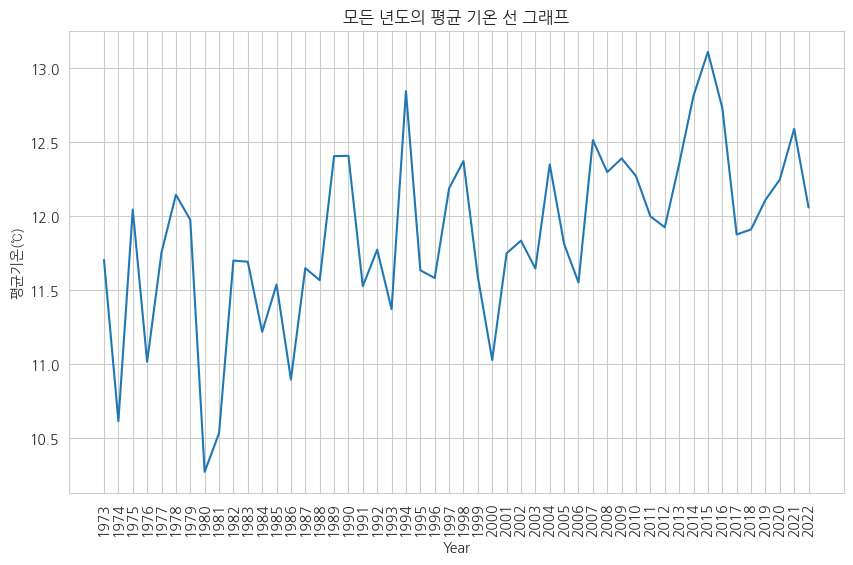

In [47]:

sns.set_style('whitegrid')
plt.rc('font', family=font_name)
plt.figure(figsize=(10, 6))
plt.plot(df3['year'], df3['평균기온(℃)'])
plt.xlabel('Year')
plt.ylabel('평균기온(℃)')
plt.title('모든 년도의 평균 기온 선 그래프')
plt.xticks(df3['year'], rotation=90)
plt.show()

In [54]:
# '일시' 열을 datetime 형식으로 변환
df['일시'] = pd.to_datetime(df['일시'])

# '년도' 열 추가
df['년도'] = df['일시'].dt.year

# 각 년도별 최고 기온 추출
max_temperatures = df.groupby('년도')['최고기온(℃)'].max().reset_index()

# 결과 출력
print(max_temperatures)

        년도  최고기온(℃)
0   1972.0     35.3
1   1973.0     35.2
2   1974.0     34.7
3   1975.0     33.6
4   1976.0     33.2
5   1977.0     35.1
6   1978.0     35.4
7   1979.0     34.0
8   1980.0     32.2
9   1981.0     35.8
10  1982.0     34.7
11  1983.0     35.0
12  1984.0     35.5
13  1985.0     34.4
14  1986.0     34.4
15  1987.0     33.4
16  1988.0     35.6
17  1989.0     34.8
18  1990.0     35.6
19  1991.0     34.7
20  1992.0     33.9
21  1993.0     32.4
22  1994.0     37.7
23  1995.0     34.5
24  1996.0     36.2
25  1997.0     36.0
26  1998.0     32.3
27  1999.0     33.1
28  2000.0     33.4
29  2001.0     35.7
30  2002.0     34.7
31  2003.0     32.0
32  2004.0     36.7
33  2005.0     36.2
34  2006.0     33.5
35  2007.0     34.9
36  2008.0     34.2
37  2009.0     33.3
38  2010.0     34.9
39  2011.0     34.3
40  2012.0     36.4
41  2013.0     35.6
42  2014.0     34.6
43  2015.0     36.3
44  2016.0     35.1
45  2017.0     35.2
46  2018.0     37.8
47  2019.0     34.3
48  2020.0     34.1


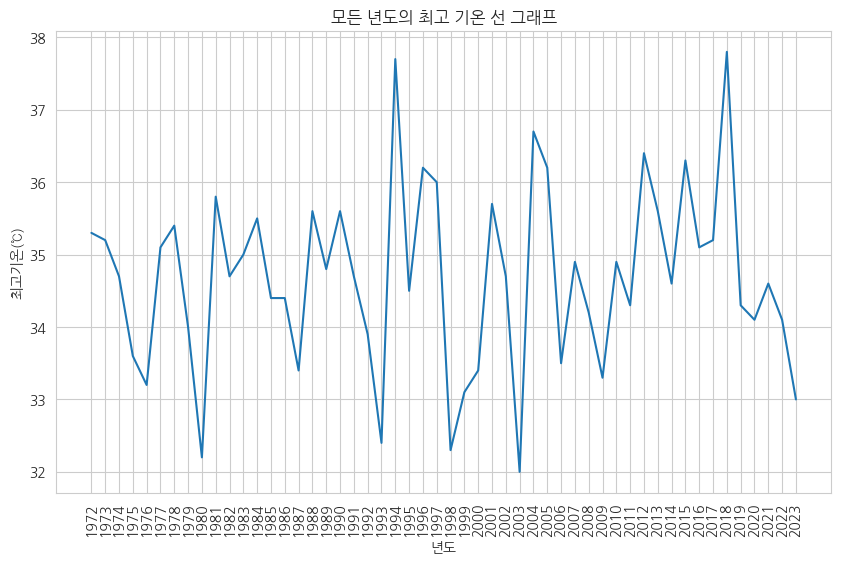

In [57]:

sns.set_style('whitegrid')
plt.rc('font', family=font_name)
plt.figure(figsize=(10, 6))
plt.plot(max_temperatures['년도'], max_temperatures['최고기온(℃)'])
plt.xlabel('년도')
plt.ylabel('최고기온(℃)')
plt.title('모든 년도의 최고 기온 선 그래프')
plt.xticks(max_temperatures['년도'], rotation=90)
plt.show()

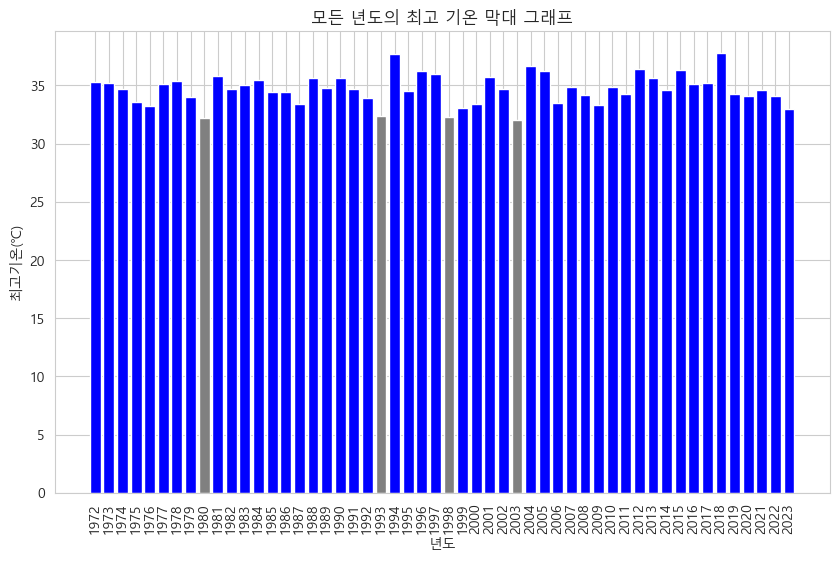

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
font_name = plt.rc('font', family="Malgun Gothic")

plt.figure(figsize=(10, 6))

bar_colors = ['grey' if temp < 33 else 'blue' for temp in max_temperatures['최고기온(℃)']]

plt.bar(max_temperatures['년도'], max_temperatures['최고기온(℃)'], color=bar_colors)
plt.xlabel('년도')
plt.ylabel('최고기온(℃)')
plt.title('모든 년도의 최고 기온 막대 그래프')
plt.xticks(max_temperatures['년도'], rotation=90)
plt.show()


1980년대와 2022년의 기온을 비교

In [60]:
df_dropped['일시'] = pd.to_datetime(df_dropped['일시'])
filtered_data = df_dropped[(df_dropped['일시'].dt.year == 1980) | (df_dropped['일시'].dt.year == 2022)]

# Extract year and month from the '일시' column
filtered_data['year'] = filtered_data['일시'].dt.year
filtered_data['month'] = filtered_data['일시'].dt.month

# Group by year and month, then calculate the average temperature
grouped_data = filtered_data.groupby(['year', 'month'])['평균기온(℃)'].mean().reset_index()

print(grouped_data)

    year  month    평균기온(℃)
0   1980      1  -3.135484
1   1980      2  -3.793103
2   1980      3   4.100000
3   1980      4   9.973333
4   1980      5  15.945161
5   1980      6  21.243333
6   1980      7  22.567742
7   1980      8  22.500000
8   1980      9  18.116667
9   1980     10  11.703226
10  1980     11   7.173333
11  1980     12  -3.512903
12  2022      1  -2.716129
13  2022      2  -1.410714
14  2022      3   6.861290
15  2022      4  13.110000
16  2022      5  17.367742
17  2022      6  22.513333
18  2022      7  25.829032
19  2022      8  24.670968
20  2022      9  20.640000
21  2022     10  12.935484
22  2022     11   8.003333
23  2022     12  -3.867742


C:\Users\thesw\AppData\Local\Temp\ipykernel_16764\3105655619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['일시'] = pd.to_datetime(df_dropped['일시'])
C:\Users\thesw\AppData\Local\Temp\ipykernel_16764\3105655619.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['year'] = filtered_data['일시'].dt.year
C:\Users\thesw\AppData\Local\Temp\ipykernel_16764\3105655619.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

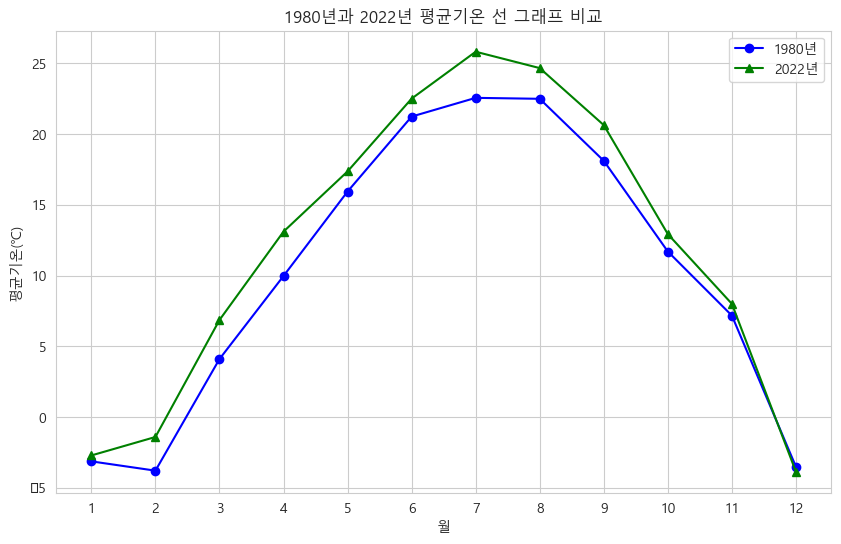

In [62]:
year_1980 = grouped_data[grouped_data['year'] == 1980]['평균기온(℃)']
year_2022 = grouped_data[grouped_data['year'] == 2022]['평균기온(℃)']

# Create line plots
plt.figure(figsize=(10, 6))

plt.plot(grouped_data['month'].unique(), year_1980, label='1980년', color='blue', marker='o')
plt.plot(grouped_data['month'].unique(), year_2022, label='2022년', color='green', marker='^')
plt.xlabel('월')
plt.ylabel('평균기온(℃)')
plt.title('1980년과 2022년 평균기온 선 그래프 비교')
plt.xticks(np.arange(1, 13, 1))
plt.legend(loc='upper right')
plt.show()

In [63]:
df_dropped['일시'] = pd.to_datetime(df_dropped['일시'])
filtered_data2 = df_dropped[(df_dropped['일시'].dt.year == 1988) | (df_dropped['일시'].dt.year == 2022)]

# Extract year and month from the '일시' column
filtered_data2['year'] = filtered_data2['일시'].dt.year
filtered_data2['month'] = filtered_data2['일시'].dt.month

# Group by year and month, then calculate the average temperature
grouped_data2 = filtered_data2.groupby(['year', 'month'])['평균기온(℃)'].mean().reset_index()

print(grouped_data2)

    year  month    평균기온(℃)
0   1988      1  -2.058065
1   1988      2  -1.686207
2   1988      3   3.322581
3   1988      4  10.696667
4   1988      5  17.341935
5   1988      6  22.196667
6   1988      7  24.829032
7   1988      8  25.470968
8   1988      9  20.236667
9   1988     10  13.370968
10  1988     11   4.510000
11  1988     12   0.106452
12  2022      1  -2.716129
13  2022      2  -1.410714
14  2022      3   6.861290
15  2022      4  13.110000
16  2022      5  17.367742
17  2022      6  22.513333
18  2022      7  25.829032
19  2022      8  24.670968
20  2022      9  20.640000
21  2022     10  12.935484
22  2022     11   8.003333
23  2022     12  -3.867742


C:\Users\thesw\AppData\Local\Temp\ipykernel_16764\580156044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['일시'] = pd.to_datetime(df_dropped['일시'])
C:\Users\thesw\AppData\Local\Temp\ipykernel_16764\580156044.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2['year'] = filtered_data2['일시'].dt.year
C:\Users\thesw\AppData\Local\Temp\ipykernel_16764\580156044.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


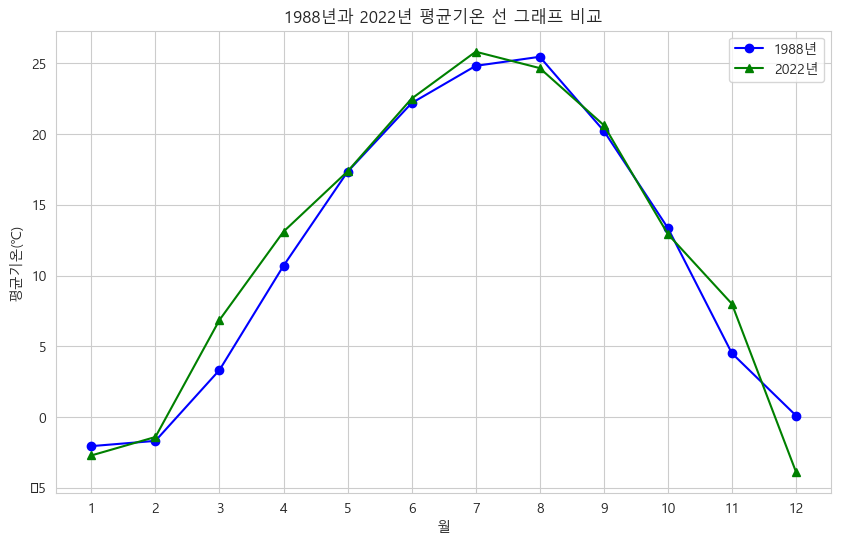

In [70]:
year_1988 = grouped_data2[grouped_data2['year'] == 1988]['평균기온(℃)']
year_2022 = grouped_data2[grouped_data2['year'] == 2022]['평균기온(℃)']

# Create line plots
plt.figure(figsize=(10, 6))

plt.plot(grouped_data2['month'].unique(), year_1988, label='1988년', color='blue', marker='o')
plt.plot(grouped_data2['month'].unique(), year_2022, label='2022년', color='green', marker='^')
plt.xlabel('월')
plt.ylabel('평균기온(℃)')
plt.title('1988년과 2022년 평균기온 선 그래프 비교')
plt.xticks(np.arange(1, 13, 1))
plt.legend(loc='upper right')
plt.show()

In [69]:
df_dropped['일시'] = pd.to_datetime(df_dropped['일시'])
filtered_data3 = df_dropped[(df_dropped['일시'].dt.year == 1988) | (df_dropped['일시'].dt.year == 2022)]

# Extract year and month from the '일시' column
filtered_data3['year'] = filtered_data3['일시'].dt.year
filtered_data3['month'] = filtered_data3['일시'].dt.month

# Group by year and month, then calculate the average temperature
grouped_data3 = filtered_data3.groupby(['year', 'month'])['최고기온(℃)'].mean().reset_index()

print(grouped_data3)

    year  month    최고기온(℃)
0   1988      1   3.329032
1   1988      2   4.606897
2   1988      3   9.496774
3   1988      4  18.350000
4   1988      5  24.532258
5   1988      6  28.170000
6   1988      7  29.119355
7   1988      8  31.232258
8   1988      9  26.693333
9   1988     10  20.925806
10  1988     11  11.563333
11  1988     12   5.658065
12  2022      1   3.603226
13  2022      2   4.735714
14  2022      3  13.412903
15  2022      4  20.923333
16  2022      5  24.780645
17  2022      6  27.733333
18  2022      7  30.309677
19  2022      8  28.522581
20  2022      9  26.703333
21  2022     10  19.422581
22  2022     11  15.583333
23  2022     12   1.964516


C:\Users\thesw\AppData\Local\Temp\ipykernel_16764\2511754208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['일시'] = pd.to_datetime(df_dropped['일시'])
C:\Users\thesw\AppData\Local\Temp\ipykernel_16764\2511754208.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data3['year'] = filtered_data3['일시'].dt.year
C:\Users\thesw\AppData\Local\Temp\ipykernel_16764\2511754208.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

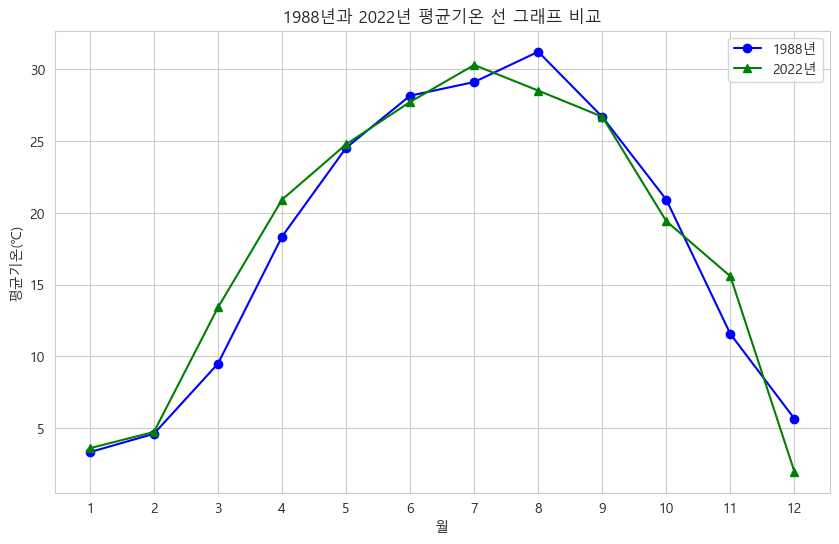

In [71]:
year_1988 = grouped_data3[grouped_data3['year'] == 1988]['최고기온(℃)']
year_2022 = grouped_data3[grouped_data3['year'] == 2022]['최고기온(℃)']

# Create line plots
plt.figure(figsize=(10, 6))

plt.plot(grouped_data3['month'].unique(), year_1988, label='1988년', color='blue', marker='o')
plt.plot(grouped_data3['month'].unique(), year_2022, label='2022년', color='green', marker='^')
plt.xlabel('월')
plt.ylabel('평균기온(℃)')
plt.title('1988년과 2022년 평균기온 선 그래프 비교')
plt.xticks(np.arange(1, 13, 1))
plt.legend(loc='upper right')
plt.show()

In [73]:
df_dropped['일시'] = pd.to_datetime(df_dropped['일시'])
filtered_data4 = df_dropped
# Extract year and month from the '일시' column
filtered_data4['year'] = filtered_data4['일시'].dt.year
filtered_data4['month'] = filtered_data4['일시'].dt.month

# Group by year and month, then calculate the average temperature
grouped_data4 = filtered_data4.groupby(['year', 'month'])['최고기온(℃)'].mean().reset_index()

print(grouped_data4)

     year  month    최고기온(℃)
0    1973      1   4.161290
1    1973      2   5.046429
2    1973      3  10.229032
3    1973      4  18.016667
4    1973      5  22.567742
..    ...    ...        ...
602  2023      3  16.825806
603  2023      4  19.750000
604  2023      5  24.493548
605  2023      6  27.946667
606  2023      7  29.500000

[607 rows x 3 columns]


C:\Users\thesw\AppData\Local\Temp\ipykernel_16764\2702635161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['일시'] = pd.to_datetime(df_dropped['일시'])
C:\Users\thesw\AppData\Local\Temp\ipykernel_16764\2702635161.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data4['year'] = filtered_data4['일시'].dt.year
C:\Users\thesw\AppData\Local\Temp\ipykernel_16764\2702635161.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

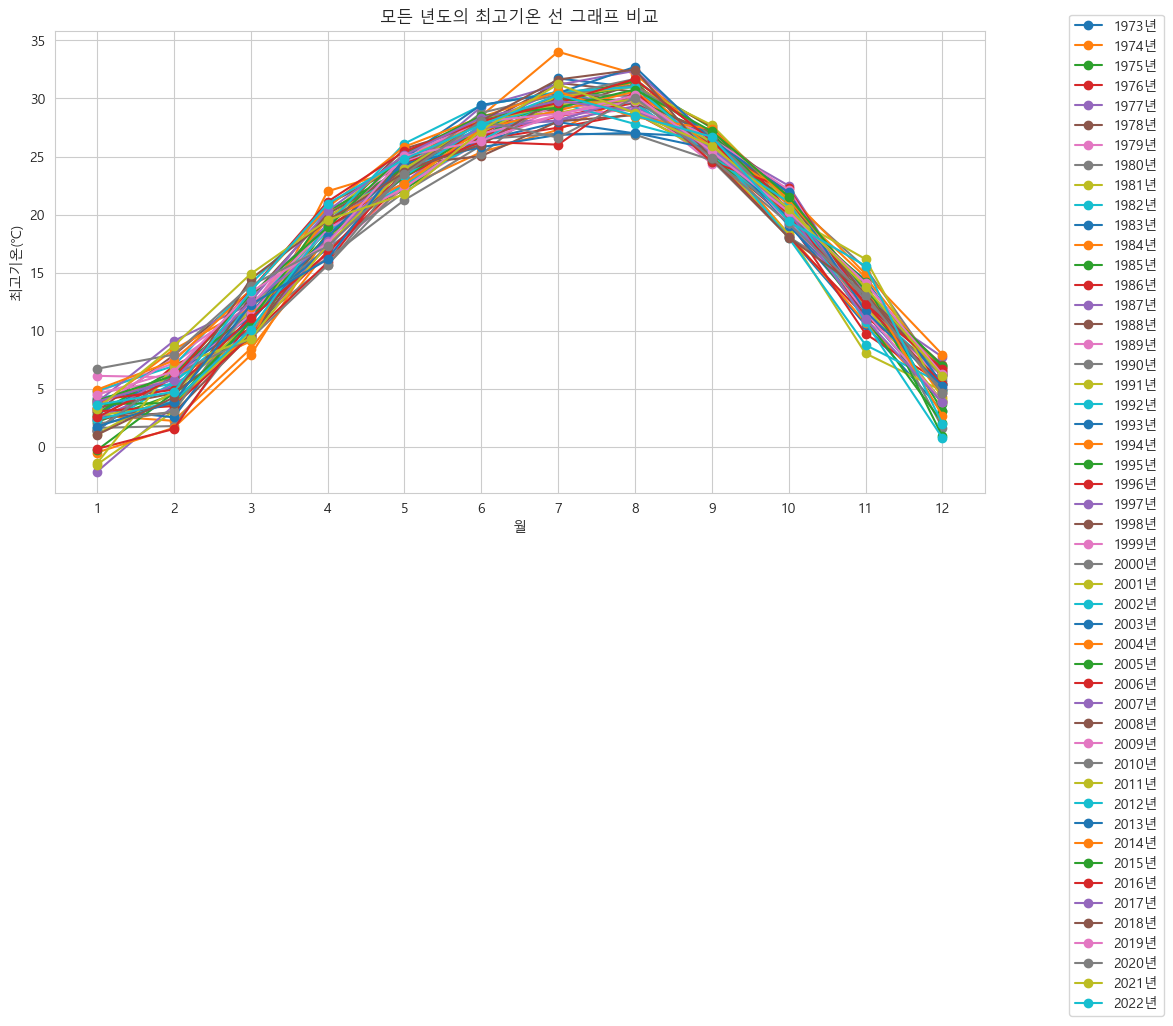

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

unique_years = grouped_data4['year'].unique()

# Loop through all unique years and plot their data
for year in unique_years:
    year_data = grouped_data4[grouped_data4['year'] == year]['최고기온(℃)']
    months_data = grouped_data4[grouped_data4['year'] == year]['month']
    
    # Check if the number of months match
    if len(months_data) == 12:
        plt.plot(grouped_data4['month'].unique(), year_data, marker='o', label=f'{year}년')

plt.xlabel('월')
plt.ylabel('최고기온(℃)')
plt.title('모든 년도의 최고기온 선 그래프 비교')
plt.xticks(np.arange(1, 13, 1))
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.05))
plt.show()


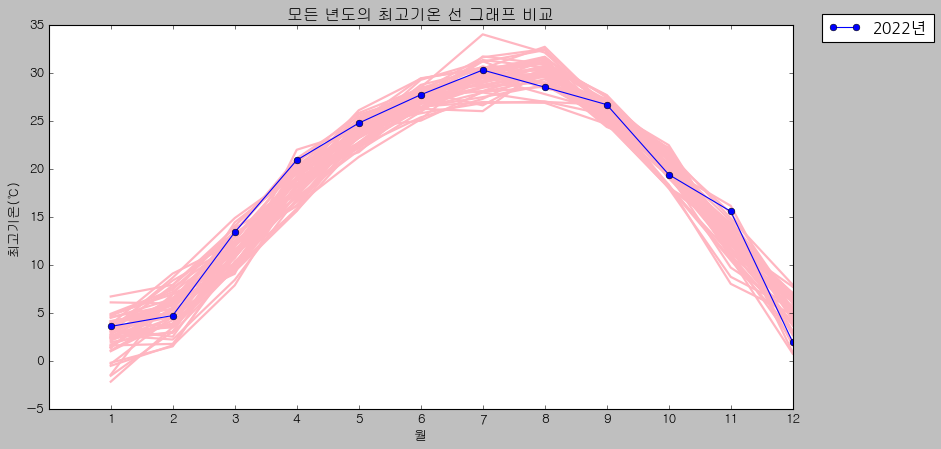

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

unique_years = grouped_data4['year'].unique()

# Loop through all unique years and plot their data
for year in unique_years:
    year_data = grouped_data4[grouped_data4['year'] == year]['최고기온(℃)']
    months_data = grouped_data4[grouped_data4['year'] == year]['month']
    
    # Check if the number of months match
    if len(months_data) == 12:
        if year == 2022:
            plt.plot(grouped_data4['month'].unique(), year_data, marker='o', label=f'{year}년')
        else:
            plt.plot(grouped_data4['month'].unique(), year_data, color='lightpink', lw=2)

plt.rc('font', family=font_name)
plt.xlabel('월')
plt.ylabel('최고기온(℃)')
plt.title('모든 년도의 최고기온 선 그래프 비교')
plt.xticks(np.arange(1, 13, 1))
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.05))

#plt.style.use("classic")
plt.show()

In [97]:
df_dropped['일시'] = pd.to_datetime(df_dropped['일시'])
filtered_data5 = df_dropped
# Extract year and month from the '일시' column
filtered_data5['year'] = filtered_data5['일시'].dt.year
filtered_data5['month'] = filtered_data5['일시'].dt.month

# Group by year and month, then calculate the average temperature
grouped_data5 = filtered_data5.groupby(['year', 'month'])['평균기온(℃)'].mean().reset_index()

print(grouped_data5)

     year  month    평균기온(℃)
0    1973      1  -0.109677
1    1973      2   0.425000
2    1973      3   3.893548
3    1973      4  12.146667
4    1973      5  16.600000
..    ...    ...        ...
602  2023      3   8.645161
603  2023      4  12.890000
604  2023      5  18.012903
605  2023      6  22.600000
606  2023      7  24.925000

[607 rows x 3 columns]


C:\Users\thesw\AppData\Local\Temp\ipykernel_16764\1395259634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['일시'] = pd.to_datetime(df_dropped['일시'])
C:\Users\thesw\AppData\Local\Temp\ipykernel_16764\1395259634.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data5['year'] = filtered_data5['일시'].dt.year
C:\Users\thesw\AppData\Local\Temp\ipykernel_16764\1395259634.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

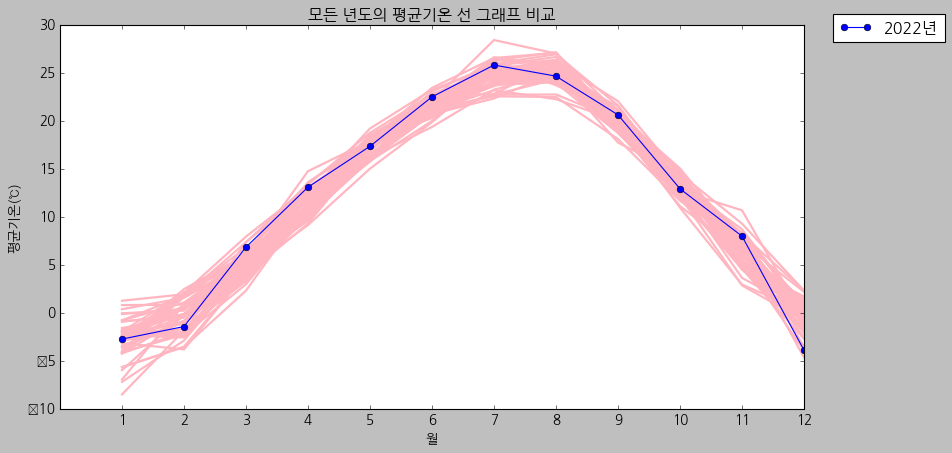

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

unique_years = grouped_data5['year'].unique()

# Loop through all unique years and plot their data
for year in unique_years:
    year_data = grouped_data5[grouped_data5['year'] == year]['평균기온(℃)']
    months_data = grouped_data5[grouped_data5['year'] == year]['month']
    
    # Check if the number of months match
    if len(months_data) == 12:
        if year == 2022:
            plt.plot(grouped_data5['month'].unique(), year_data, marker='o', label=f'{year}년')
        else:
            plt.plot(grouped_data5['month'].unique(), year_data, color='lightpink', lw=2)

plt.rc('font', family=font_name)
plt.xlabel('월')
plt.ylabel('평균기온(℃)')
plt.title('모든 년도의 평균기온 선 그래프 비교')
plt.xticks(np.arange(1, 13, 1))
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.05))

#plt.style.use("classic")
plt.show()

C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


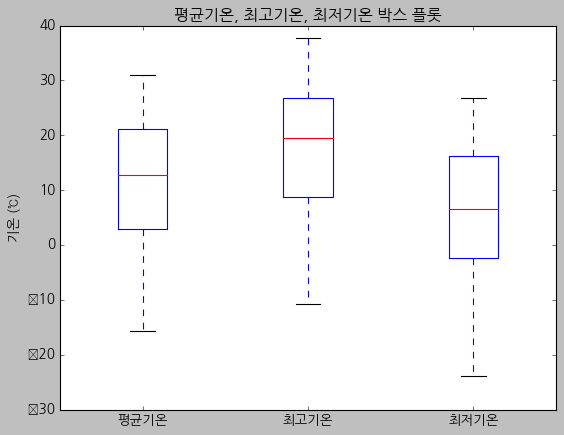

In [91]:


# Create a box plot for 평균기온(℃), 최고기온(℃), and 최저기온(℃)
boxplot_data = [df_dropped['평균기온(℃)'], df_dropped['최고기온(℃)'], df_dropped['최저기온(℃)']]

plt.boxplot(boxplot_data, labels=['평균기온', '최고기온', '최저기온'])
plt.title('평균기온, 최고기온, 최저기온 박스 플롯')
plt.ylabel('기온 (℃)')

plt.show()

C:\Users\thesw\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


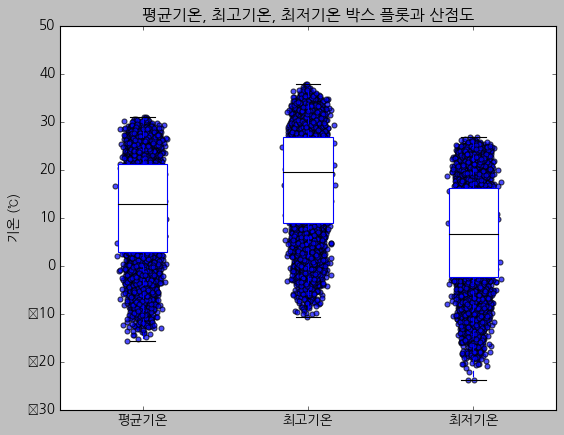

In [96]:
import numpy as np

# Create a box plot for 평균기온(℃), 최고기온(℃), and 최저기온(℃)
boxplot_data = [df_dropped['평균기온(℃)'], df_dropped['최고기온(℃)'], df_dropped['최저기온(℃)']]
labels = ['평균기온', '최고기온', '최저기온']

fig, ax = plt.subplots()
bplot = ax.boxplot(boxplot_data, labels=labels, patch_artist=True, medianprops={'color': 'black'})

# Scatter plot
for i, (label, data) in enumerate(zip(labels, boxplot_data)):
    y = data
    x = np.random.normal(i + 1, 0.04, size=len(y))
    plt.scatter(x, y, alpha=0.7)

plt.title('평균기온, 최고기온, 최저기온 박스 플롯과 산점도')
plt.ylabel('기온 (℃)')

plt.show()
